# HEART DISEASE DETECTION

## LOADING DEPENDANCIES AND DATA

In [1]:
# importing our dependancies

import keras
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading and viewing our data

df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## EXPLORATORY DATA ANALYSIS

In [3]:
# checking the shape/dimensions of our data

df.shape

(918, 12)

In [4]:
# cheking data for null values
df.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [5]:
# checking for duplicates in our data
df.duplicated().sum()

np.int64(0)

In [6]:
# checking column data types
df.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


In [7]:
# getting a list of our object columns
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [8]:
# previewing our data
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## DATA VISUALIZATIONS

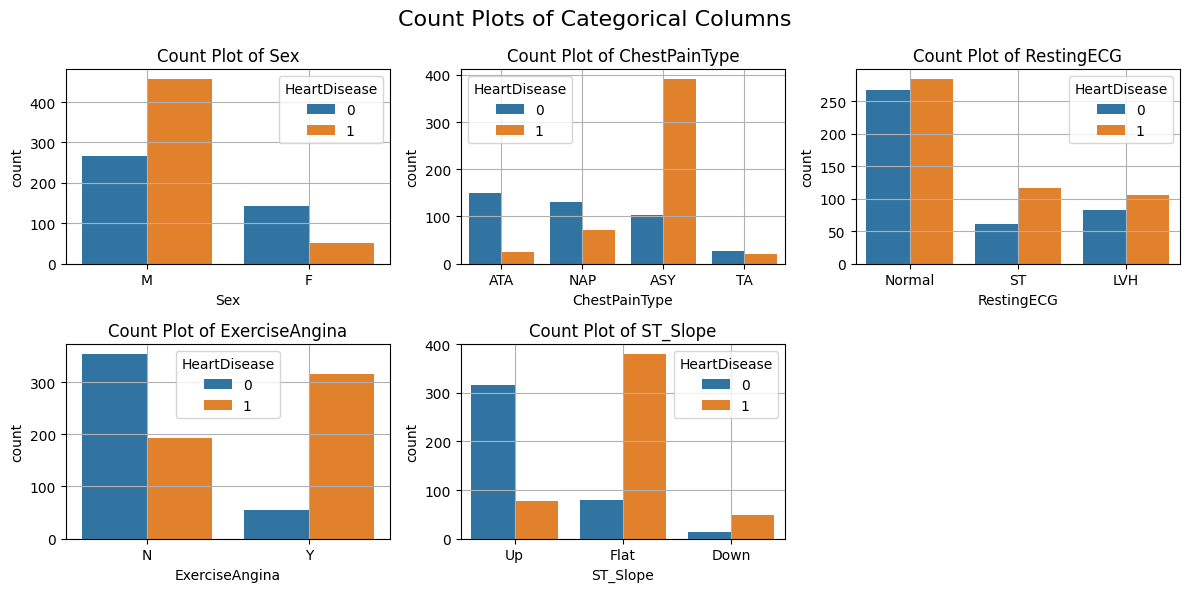

In [9]:
# plotting countplots of our data
plt.figure(figsize=(12, 6))
plt.suptitle('Count Plots of Categorical Columns', fontsize=16)
for i in enumerate(categorical_cols):
  plt.subplot(2, 3, i[0]+1)
  sns.countplot(x=i[1], data=df, hue='HeartDisease')
  plt.title(f'Count Plot of {i[1]}')
  plt.grid()


plt.tight_layout()
plt.show()

In [10]:
# checking value counts of our categorical data
for col in categorical_cols:
  print(df[col].value_counts())

Sex
M    725
F    193
Name: count, dtype: int64
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


In [11]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [12]:
# checking data statistics of numerical columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [13]:
# checking value counts of FastingBS column
df['FastingBS'].value_counts()

,count
FastingBS,
0,704
1,214


In [14]:
# checking value counts of our target column
df['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


## OUTLIER DETECTION

In [15]:
# getting columns with continuos numerical values
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
num_cols

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

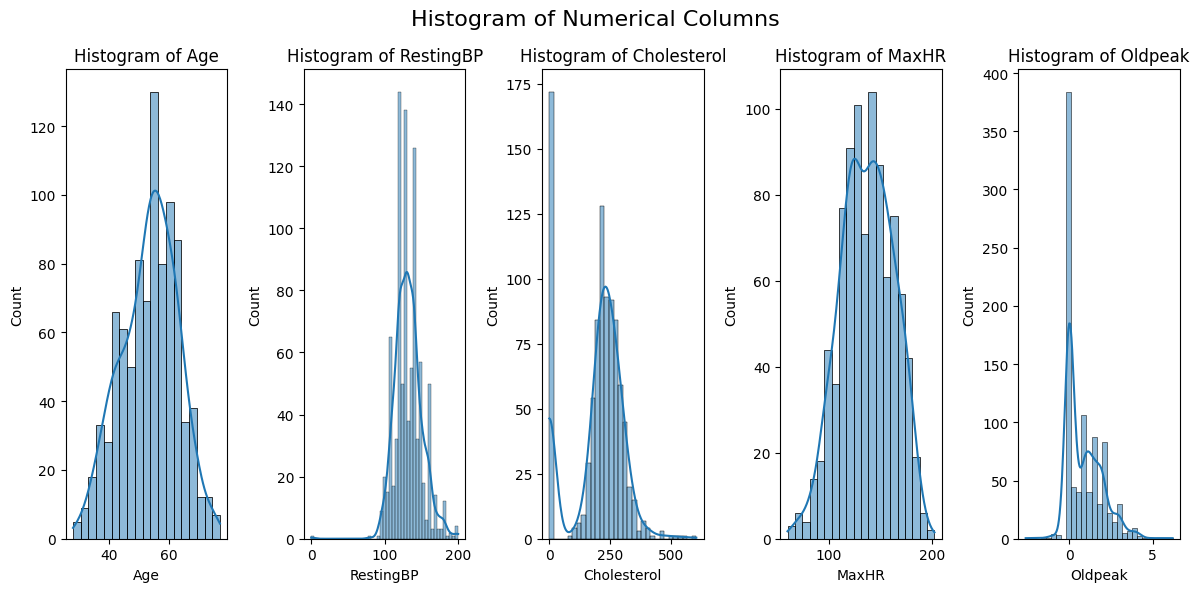

In [16]:
# checking data distribution of our numerical continuos columns
plt.figure(figsize=(12, 6))
plt.suptitle('Histogram of Numerical Columns', fontsize=16)

for i in enumerate(num_cols):
  plt.subplot(1, 5, i[0]+1)
  sns.histplot(df[i[1]], kde=True)
  plt.title(f'Histogram of {i[1]}')

plt.tight_layout()
plt.show()

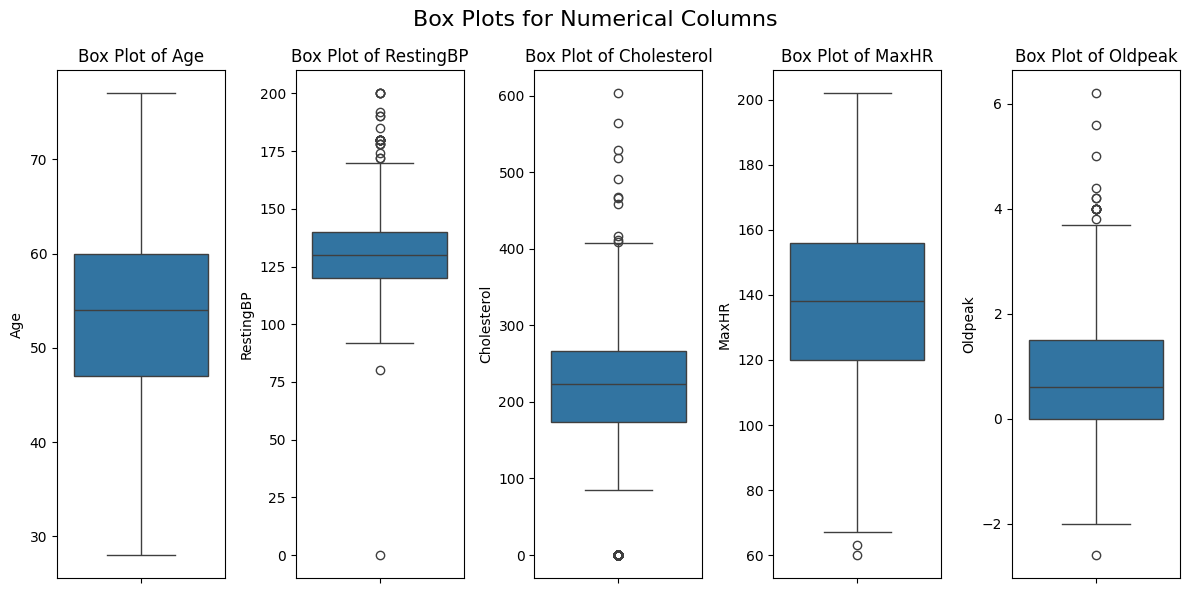

In [17]:
# plotting box plots for outlier detection
plt.figure(figsize=(12, 6))
plt.suptitle('Box Plots for Numerical Columns', fontsize=16)

for i in enumerate(num_cols):
  plt.subplot(1, 5, i[0]+1)
  sns.boxplot(y=i[1], data=df)
  plt.title(f'Box Plot of {i[1]}')


plt.tight_layout()
plt.show()

## OUTLIER REMOVAL/CLIPPING

In [18]:
# writting a function to clip outliers instead of dropping them
def clip_outliers(data):
  for col in num_cols:
    q1 = np.percentile(df[col], 25)
    q3 = np.percentile(df[col], 75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

  return data

In [19]:
# calling our funtion to clip outliers in our data
df = clip_outliers(df)

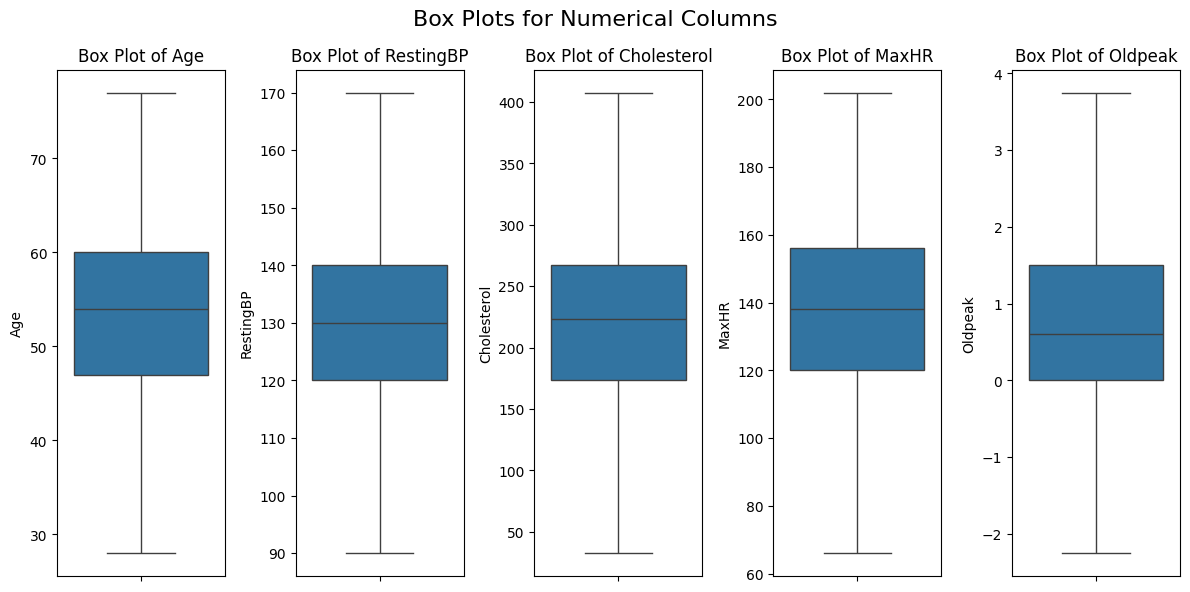

In [20]:
# plotting box plots to see if outliers still exist
plt.figure(figsize=(12, 6))
plt.suptitle('Box Plots for Numerical Columns', fontsize=16)

for i in enumerate(num_cols):
  plt.subplot(1, 5, i[0]+1)
  sns.boxplot(y=i[1], data=df)
  plt.title(f'Box Plot of {i[1]}')


plt.tight_layout()
plt.show()

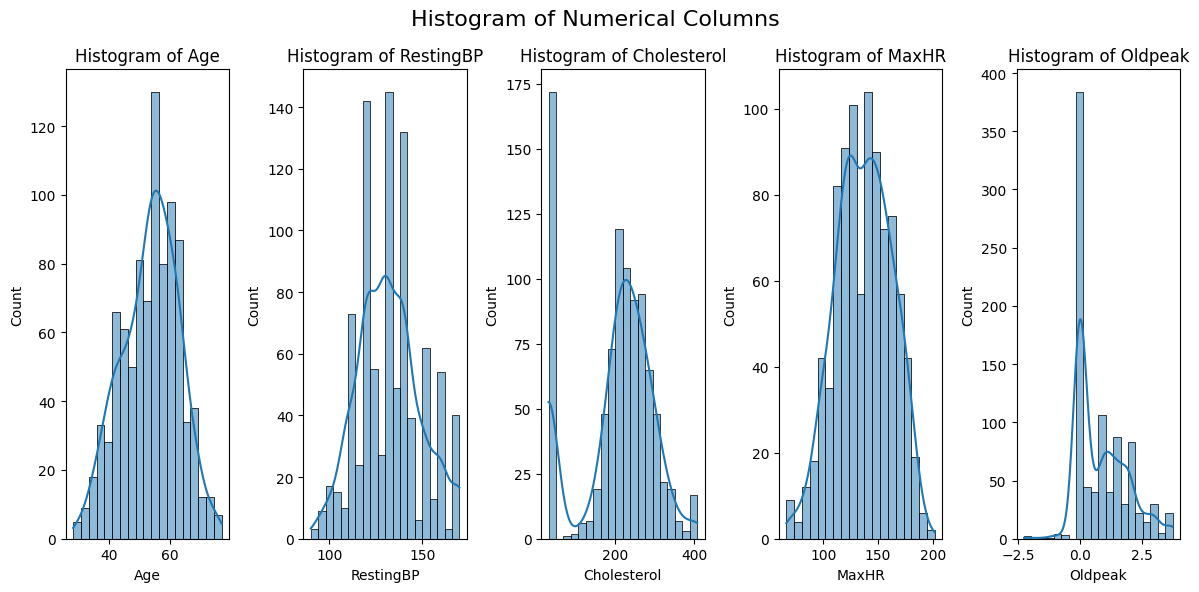

In [21]:
# checking data distribution one more time
plt.figure(figsize=(12, 6))
plt.suptitle('Histogram of Numerical Columns', fontsize=16)

for i in enumerate(num_cols):
  plt.subplot(1, 5, i[0]+1)
  sns.histplot(df[i[1]], kde=True)
  plt.title(f'Histogram of {i[1]}')

plt.tight_layout()
plt.show()

In [22]:
df.shape

(918, 12)

In [23]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.000,47.00,54.0,60.0,77.000
RestingBP,918.0,132.125272,16.993314,90.000,120.00,130.0,140.0,170.000
Cholesterol,918.0,203.985158,95.922341,32.625,173.25,223.0,267.0,407.625
FastingBS,918.0,0.233115,0.423046,0.000,0.00,0.0,0.0,1.000
MaxHR,918.0,136.819172,25.432057,66.000,120.00,138.0,156.0,202.000
Oldpeak,918.0,0.877778,1.031693,-2.250,0.00,0.6,1.5,3.750
HeartDisease,918.0,0.553377,0.497414,0.000,0.00,1.0,1.0,1.000


## DATA TRANSFORMATION

In [24]:
# encoding each object column separately

sex_encoder = LabelEncoder()
chestpain_encoder = LabelEncoder()
restingecg_encoder = LabelEncoder()
exercise_encoder = LabelEncoder()
slope_encoder = LabelEncoder()

df['Sex'] = sex_encoder.fit_transform(df['Sex'])
df['ChestPainType'] = chestpain_encoder.fit_transform(df['ChestPainType'])
df['RestingECG'] = restingecg_encoder.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = exercise_encoder.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = slope_encoder.fit_transform(df['ST_Slope'])

In [25]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289.0,0,1,172,0,0.0,2,0
1,49,0,2,160,180.0,0,1,156,0,1.0,1,1
2,37,1,1,130,283.0,0,2,98,0,0.0,2,0
3,48,0,0,138,214.0,0,1,108,1,1.5,1,1
4,54,1,2,150,195.0,0,1,122,0,0.0,2,0


## CORRELATION CHECKING

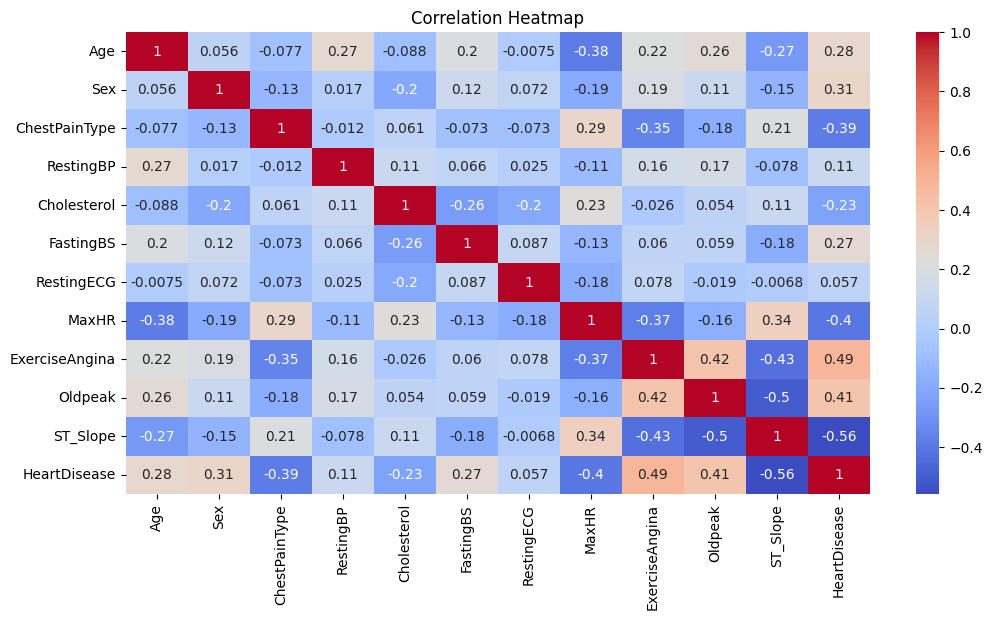

In [26]:
# plotting a correlation heatmap of our data
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [27]:
# checking correlation of each column against our target column
df.corr()['HeartDisease']

,HeartDisease
Age,0.282039
Sex,0.305445
ChestPainType,-0.386828
RestingBP,0.113191
Cholesterol,-0.225304
FastingBS,0.267291
RestingECG,0.057384
MaxHR,-0.400519
ExerciseAngina,0.494282
Oldpeak,0.410211


In [28]:
# dropping columns with the least correlations
df = df.drop(['RestingBP', 'RestingECG'], axis=1)
df.head()

,Age,Sex,ChestPainType,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,289.0,0,172,0,0.0,2,0
1,49,0,2,180.0,0,156,0,1.0,1,1
2,37,1,1,283.0,0,98,0,0.0,2,0
3,48,0,0,214.0,0,108,1,1.5,1,1
4,54,1,2,195.0,0,122,0,0.0,2,0


## SAVING CATEGORICAL ENCODERS

In [29]:
# saving our encoders to be used during deployment/ shap analysis

joblib.dump(sex_encoder, 'sex_encoder.pkl')
joblib.dump(chestpain_encoder, 'chestpain_encoder.pkl')
joblib.dump(exercise_encoder, 'exercise_encoder.pkl')
joblib.dump(slope_encoder, 'slope_encoder.pkl')

['slope_encoder.pkl']

## DATA SPLITTING

In [30]:
# separating features from target column
y = df['HeartDisease']
X = df.drop('HeartDisease', axis=1)

# splitting our data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [31]:
# checking shape of train and test data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((826, 9), (92, 9), (826,), (92,))

## TRAINING OUR MODELS

In [32]:
# creating a dictionary of our models and model names
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier(),
    "Support Vector Machine": SVC(kernel='linear'),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=15)
}

# creating an empty list for collection of our trained models
trained_models = []

for name, model in models.items():
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, pred)
  print(f"\n{name} Accuracy: {accuracy}")
  precision = precision_score(y_test, pred)
  print(f"{name} Precision: {precision}")
  trained_models.append(model)


Logistic Regression Accuracy: 0.8478260869565217
Logistic Regression Precision: 0.8846153846153846

Decision Tree Accuracy: 0.782608695652174
Decision Tree Precision: 0.8541666666666666

Random Forest Accuracy: 0.8804347826086957
Random Forest Precision: 0.9056603773584906

XGBoost Accuracy: 0.8695652173913043
XGBoost Precision: 0.8888888888888888

Support Vector Machine Accuracy: 0.8369565217391305
Support Vector Machine Precision: 0.8679245283018868

K-Nearest Neighbors Accuracy: 0.6847826086956522
K-Nearest Neighbors Precision: 0.7358490566037735


## CONFUSION MATRICES

### LOGISTIC REGRESSION

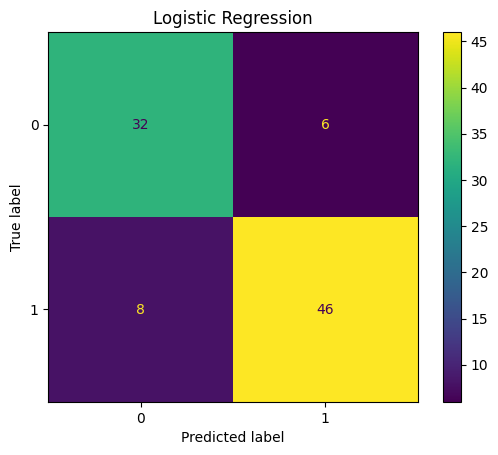

In [33]:
# confusion matrix of Logistic Regression
pred = trained_models[0].predict(X_test)
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=trained_models[0].classes_)
disp.plot()
plt.title('Logistic Regression')
plt.show()

### RANDOM FOREST

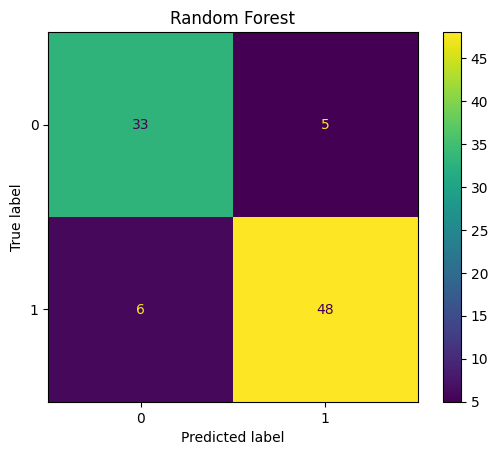

In [34]:
# confusion matrix of Random Forest
pred = trained_models[2].predict(X_test)
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=trained_models[2].classes_)
disp.plot()
plt.title('Random Forest')
plt.show()

### XGBOOST

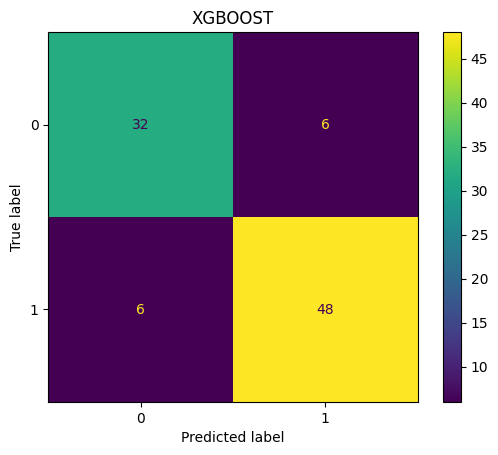

In [35]:
# confusion matrix of xgboost classifier
pred = trained_models[3].predict(X_test)
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=trained_models[3].classes_)
disp.plot()
plt.title('XGBOOST')
plt.show()

### SVM CLASSIFIER

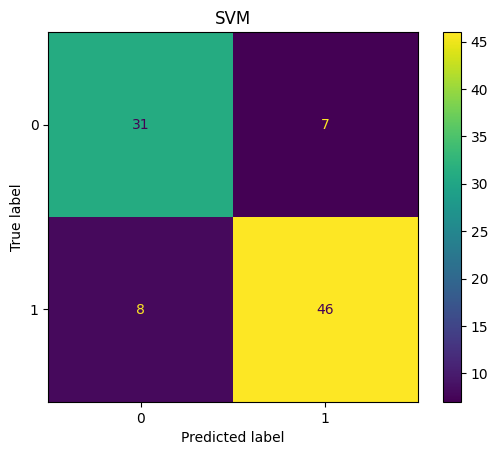

In [36]:
# confusion matrix of SVM classifier
pred = trained_models[4].predict(X_test)
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=trained_models[4].classes_)
disp.plot()
plt.title('SVM')
plt.show()

### KNN CLASSIFIER

Text(0.5, 1.0, 'KNN')

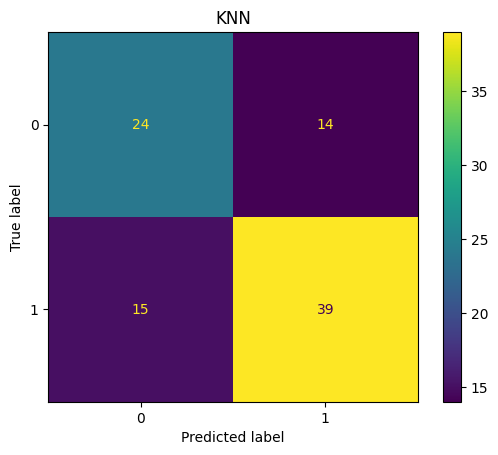

In [37]:
# confusion matrix of KNN classifier
pred = trained_models[5].predict(X_test)
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=trained_models[5].classes_)
disp.plot()
plt.title('KNN')

## PARAMETER TUNINGS

### RANDOM FOREST

In [38]:
# parameter tunnig for Random Forest Classifier

model = RandomForestClassifier()

# choosing which parameters to tune
params = {
    "n_estimators": [300, 350, 400],
    "max_depth": [3, 5, 7, 9],
    "min_samples_split": [6, 7, 8]
}

# initializing our grid object
grid = GridSearchCV(estimator=model, param_grid=params, cv=3, scoring='accuracy')
# fitting our grid object
grid.fit(X_train, y_train)


print("The best parameters are: {}".format(grid.best_params_))
print("The best scoring is: {}".format(grid.best_score_))
best_model = grid.best_estimator_

The best parameters are: {'max_depth': 7, 'min_samples_split': 7, 'n_estimators': 350}
The best scoring is: 0.8728765920070268


In [39]:
pred = best_model.predict(X_test)
accuracy_score(y_test, pred)

0.8804347826086957

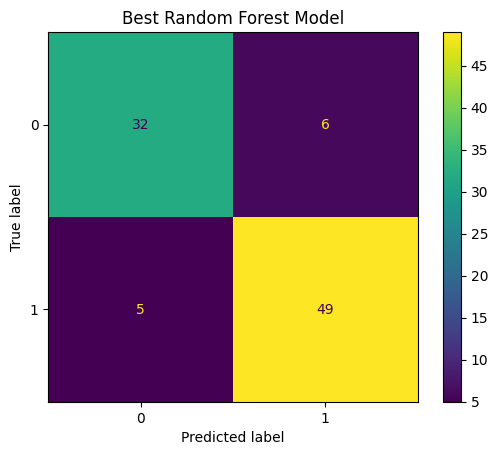

In [40]:
# confusion matrix of Best Random Forest Model
pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.title('Best Random Forest Model')
plt.show()

### XGBOOST

In [41]:
# parameter tuning for XGBClassifier

model = xgb.XGBClassifier()

# choosing which parameters to tune
params = {
    "n_estimators": [300, 350, 400],
    "max_depth": [3, 5, 7, 9],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 0.9, 1.0]
}

# initializing our grid object
grid = GridSearchCV(estimator=model, param_grid=params, cv=3, scoring='accuracy')
# training our grid object
grid.fit(X_train, y_train)

print("The best parameters are: {}".format(grid.best_params_))
print("The best scoring is: {}".format(grid.best_score_))
best_xgb = grid.best_estimator_

The best parameters are: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.9}
The best scoring is: 0.8716688625384278


In [42]:
pred = best_xgb.predict(X_test)
accuracy_score(y_test, pred)

0.8913043478260869

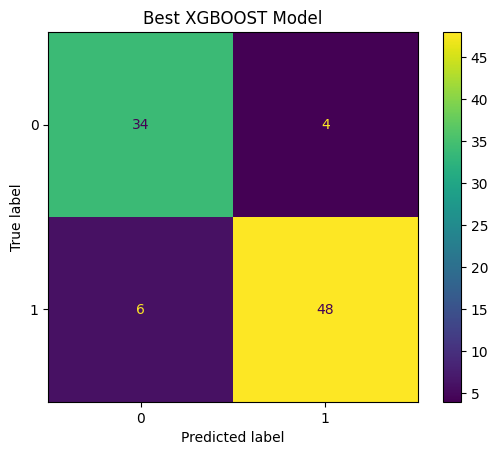

In [43]:
# confusion matrix of the best xgboost classifier model
pred = best_xgb.predict(X_test)
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_xgb.classes_)
disp.plot()
plt.title('Best XGBOOST Model')
plt.show()

## DEEP LEARNING MODEL

In [44]:
# initializing our deep learning model
model_nn = Sequential(
    [
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(2, activation='softmax')
    ]
)

In [46]:
# compiling our deep learning model
model_nn.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [47]:
# training our deep learning model
hist = model_nn.fit(X_train, y_train, batch_size=5,epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.5950 - loss: 7.6208 - val_accuracy: 0.7391 - val_loss: 0.5508
Epoch 2/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7016 - loss: 0.5817 - val_accuracy: 0.6848 - val_loss: 0.5347
Epoch 3/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7263 - loss: 0.5604 - val_accuracy: 0.7609 - val_loss: 0.4976
Epoch 4/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7656 - loss: 0.5258 - val_accuracy: 0.6739 - val_loss: 0.5727
Epoch 5/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7070 - loss: 0.5943 - val_accuracy: 0.7717 - val_loss: 0.5362
Epoch 6/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7810 - loss: 0.5048 - val_accuracy: 0.7935 - val_loss: 0.4954
Epoch 7/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7645 - loss: 0.5606 - val_accuracy: 0.7826 - val_loss: 0.4485
Epoch 8/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8242 - loss: 0.4326 - val_accuracy: 0

In [48]:
# evaluting model performance on train data
model_nn.evaluate(X_train, y_train)

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8238 - loss: 0.4146


[0.43352094292640686, 0.8111380338668823]

In [49]:
# evaluting model performance on test data
model_nn.evaluate(X_test, y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 269ms/step - accuracy: 0.8037 - loss: 0.4511


[0.4241008758544922, 0.8260869383811951]

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step


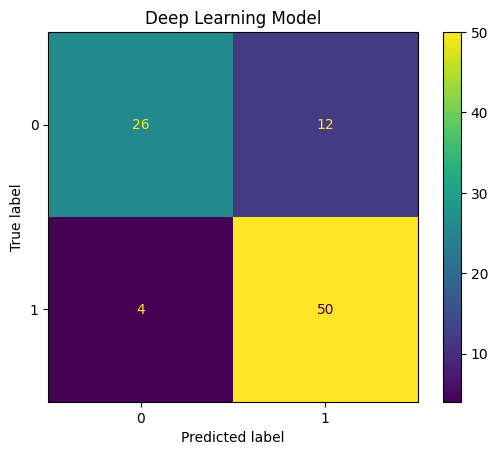

In [50]:
# confusion matrix our deep learning model
pred = model_nn.predict(X_test)
pred = np.argmax(pred, axis=1)
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.title('Deep Learning Model')
plt.show()

## MODEL SAVING

In [51]:
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(best_xgb, 'best_xgb.pkl')
model_nn.save('model_nn.keras')